# Plants Clustering
<hr>

Dataset : https://archive.ics.uci.edu/ml/datasets/Plants

This dataset has been extracted from the USDA plants database. It contains all plants (species and genera) in the database and the states of USA and Canada where they occur.

The data is in the transactional form. It contains the Latin names (species or genus) and state abbreviations..Each row contains a Latin name (species or genus) and a list of state abbreviations.

Each row contains a Latin name (species or genus) and a list of state abbreviations.

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [10]:
cols = ['Class']
for i in range(64):
    str = 'f{}'.format(i)
    cols.append(str)

In [11]:
# read .csv from provided dataset
csv_filename="data_Mar_64.txt"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,names=cols)

In [12]:
df.head()

,Class,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


In [13]:
df.shape

(1600, 65)

In [14]:
df['Class'].unique()

array(['Acer Campestre', 'Acer Capillipes', 'Acer Circinatum', 'Acer Mono',
       'Acer Opalus', 'Acer Palmatum', 'Acer Pictum', 'Acer Platanoids',
       'Acer Rubrum', 'Acer Rufinerve', 'Acer Saccharinum',
       'Alnus Cordata', 'Alnus Maximowiczii', 'Alnus Rubra',
       'Alnus Sieboldiana', 'Alnus Viridis', 'Arundinaria Simonii',
       'Betula Austrosinensis', 'Betula Pendula', 'Callicarpa Bodinieri',
       'Castanea Sativa', 'Celtis Koraiensis', 'Cercis Siliquastrum',
       'Cornus Chinensis', 'Cornus Controversa', 'Cornus Macrophylla',
       'Cotinus Coggygria', 'Crataegus Monogyna', 'Cytisus Battandieri',
       'Eucalyptus Glaucescens', 'Eucalyptus Neglecta',
       'Eucalyptus Urnigera', 'Fagus Sylvatica', 'Ginkgo Biloba',
       'Ilex Aquifolium', 'Ilex Cornuta', 'Liquidambar Styraciflua',
       'Liriodendron Tulipifera', 'Lithocarpus Cleistocarpus',
       'Lithocarpus Edulis', 'Magnolia Heptapeta', 'Magnolia Salicifolia',
       'Morus Nigra', 'Olea Europaea', 'Phild

In [15]:
len(df['Class'].unique())

100

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [17]:
df['Class'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [18]:
df.head()

,Class,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,0,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,0,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,0,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,0,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,0,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


In [19]:
features = df.columns[1:]
features

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63'],
      dtype='object')

In [20]:
X = df[features]
y = df['Class']

In [21]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63
0,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,0.015625,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,0.021484,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,0.019531,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,0.027344,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,0.017578,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


In [22]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [24]:
print (X_train.shape, y_train.shape)

(960, 64) (960,)


# Unsupervised Learning

## PCA

In [34]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [35]:
len(features)

64

In [38]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.17301085  0.3678857  -0.0376574  ..., -0.04515881  0.10784595
  -0.02792765]
 [ 0.06860826  0.17120937 -0.16743028 ...,  0.05114625 -0.04738932
   0.00340058]
 [-0.01217028 -0.08481612  0.30296649 ..., -0.04069022  0.17427581
  -0.03918934]
 ..., 
 [-0.00740531 -0.00196931 -0.00802288 ..., -0.00735558  0.00890972
   0.04235162]
 [ 0.0151684   0.01028616  0.01684166 ...,  0.05617535  0.01335735
  -0.00934287]
 [ 0.1249996   0.12499963  0.1249996  ...,  0.12499625  0.12500077
   0.12500567]]
[  3.66346160e-01   1.36479827e-01   8.76136880e-02   6.76087515e-02
   5.62833251e-02   4.56950262e-02   2.62293511e-02   2.23588970e-02
   1.85408968e-02   1.68000379e-02   1.51209237e-02   1.19416550e-02
   9.62145182e-03   8.87215304e-03   8.70710022e-03   7.38789680e-03
   6.71526565e-03   6.42370588e-03   5.45940047e-03   4.81032134e-03
   4.16110779e-03   4.04450437e-03   3.98474616e-03   3.56179763e-03
   3.37395149e-03   3.11290968e-03   2.93953519e-03   2.72151214e-03
   2.66239203e-03

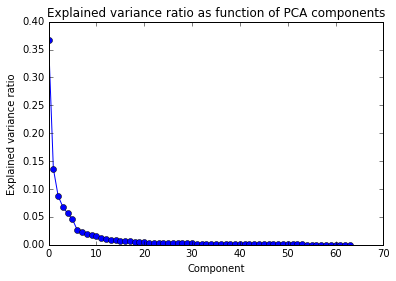

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [45]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
print(reduced_data[:10])  # print upto 10 elements

[[-0.03307489 -0.02892331]
 [-0.02422727 -0.01839179]
 [-0.02629431 -0.03441262]
 [ 0.00831379  0.00113884]
 [ 0.00117595 -0.05432339]
 [-0.00205065 -0.02189747]
 [ 0.00664743 -0.0258008 ]
 [-0.02080581 -0.00804307]
 [-0.0357074   0.00314164]
 [-0.02317419  0.00840398]]


In [47]:
kmeans = KMeans(n_clusters=100)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=100, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [48]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [49]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7
print('*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[-0.00569156 -0.02757334]
 [ 0.13246213 -0.01621052]
 [-0.09288891  0.03512336]
 [-0.04629578 -0.14273808]
 [ 0.16744926  0.05257156]
 [ 0.07064058 -0.02604673]
 [-0.02826312  0.01388355]
 [-0.05375892 -0.08335535]
 [-0.11115126  0.05581906]
 [ 0.01562468 -0.07296821]
 [-0.01047396  0.02356011]
 [ 0.11544097  0.06833212]
 [ 0.01681328 -0.00510339]
 [-0.07041002 -0.00715404]
 [ 0.1227513   0.02325   ]
 [ 0.03765457  0.02418866]
 [-0.0727005   0.04570051]
 [ 0.23678466  0.02092281]
 [ 0.09965405 -0.07586469]
 [ 0.02956955 -0.14766104]
 [ 0.24783442  0.09124872]
 [-0.05173007 -0.01858108]
 [-0.07509212 -0.16741198]
 [ 0.15820097  0.02933633]
 [ 0.17652355 -0.08188853]
 [ 0.08251682  0.03693327]
 [-0.07078136 -0.13687759]
 [ 0.19897381  0.06630531]
 [-0.02931185 -0.06391228]
 [ 0.09146325 -0.04824824]
 [-0.08578384  0.01404901]
 [-0.02962707 -0.11551206]
 [ 0.19834241 -0.03538007]
 [-0.05972279  0.03032355]
 [ 0.08670001 -0.00606107]
 [-0.03116005  0.04406629]
 [

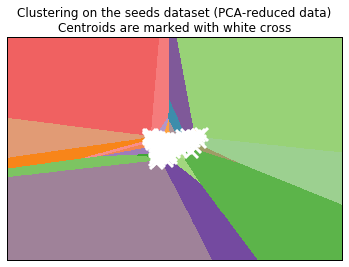

In [50]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the seeds dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Applying agglomerative clustering via scikit-learn

In [52]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=100, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [ 9 33 33 ..., 47 47 47]


___

In [53]:
from sklearn.cross_validation import train_test_split
X = df[features]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=42)

### K Means

In [55]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=100, random_state=5)
clf.fit(X_train)
print clf.labels_.shape
print clf.labels_

(1200L,)
[41  7 41 ..., 98 70 58]


In [56]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

In [57]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.46
Homogeneity score:0.84 
Completeness score: 0.87 
Confusion matrix
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


### Affinity Propogation

In [58]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print aff.cluster_centers_indices_.shape

(66L,)


In [59]:
y_pred = aff.predict(X_test)

In [60]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.37
Homogeneity score:0.77 
Completeness score: 0.87 
Confusion matrix
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


## MeanShift

In [61]:
ms = cluster.MeanShift()
ms.fit(X_train)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [62]:
y_pred = ms.predict(X_test)

In [63]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.00047
Homogeneity score:0.015 
Completeness score: 1.0 
Confusion matrix
[[1 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 ..., 
 [3 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 [4 0 0 ..., 0 0 0]]


### Mixture of Guassian Models

In [65]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=100, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print "Adjusted rand score for covariance={}:{:.2}".format(covariance_type, 
                                                               metrics.adjusted_rand_score(y_test_heldout, y_pred))


Adjusted rand score for covariance=spherical:0.2
Adjusted rand score for covariance=tied:0.24
Adjusted rand score for covariance=diag:0.2
Adjusted rand score for covariance=full:0.082


___

In [67]:
X = df[features].values
y= df['Class'].values
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [77]:
c = []
from matplotlib.pyplot import cm 
n=100
color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
    c.append(next(color))

In [80]:
c[99]

array([  1.00000000e+00,   1.22464680e-16,   6.12323400e-17,
         1.00000000e+00])

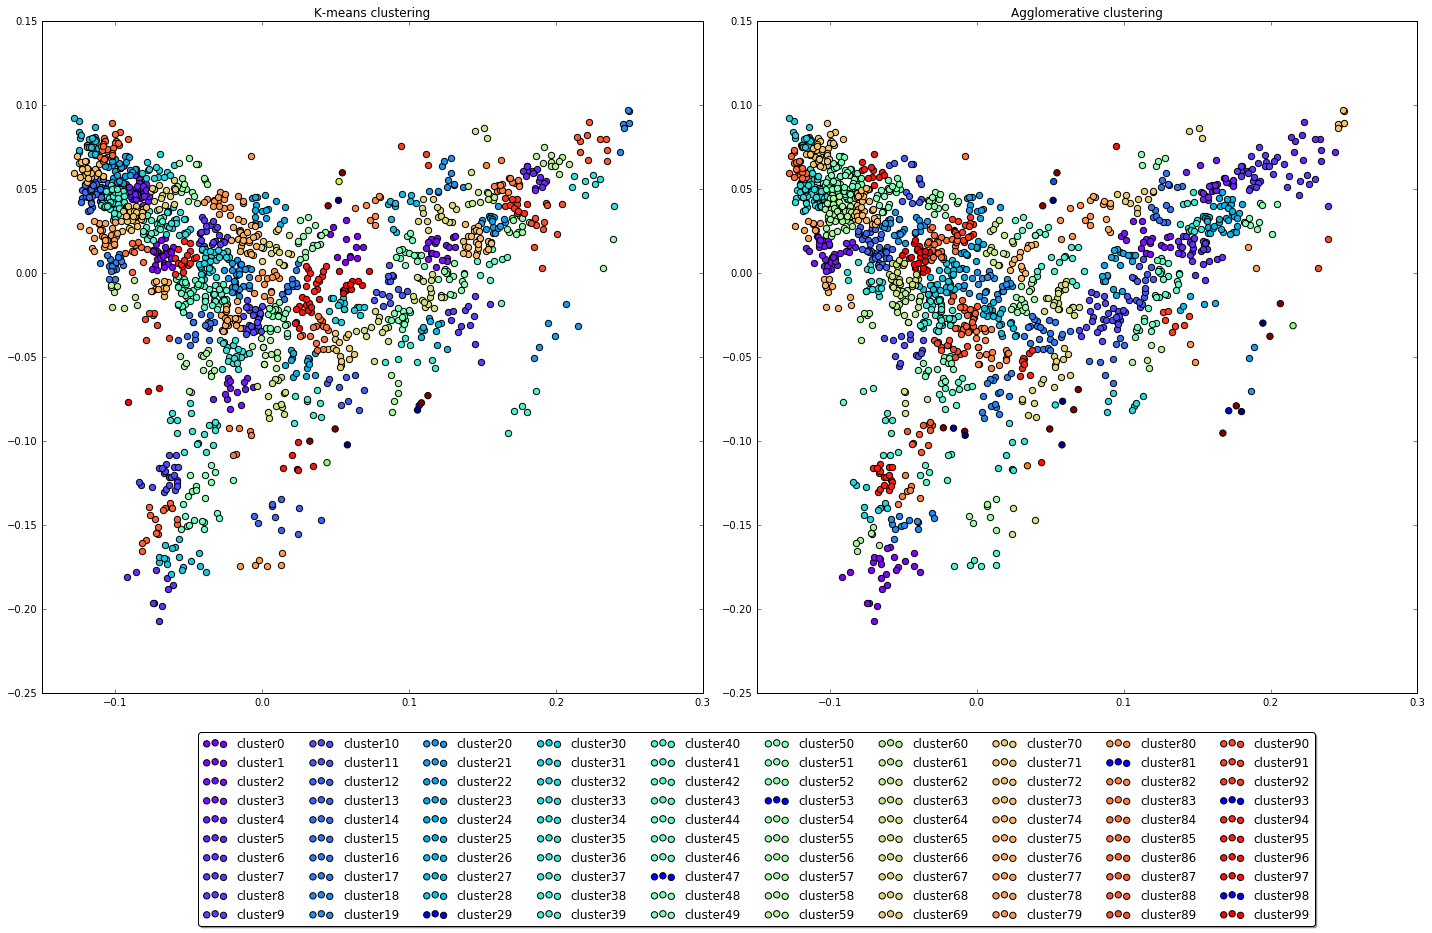

In [94]:
n = 100
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

km = KMeans(n_clusters= n , random_state=0)
y_km = km.fit_predict(X)

for i in range(n):
    ax1.scatter(X[y_km==i,0], X[y_km==i,1], c=c[i], marker='o', s=40, label='cluster{}'.format(i))
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=100, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
for i in range(n):
    ax2.scatter(X[y_ac==i,0], X[y_ac==i,1], c=c[i], marker='o', s=40, label='cluster{}'.format(i))
ax2.set_title('Agglomerative clustering')

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.05),
          fancybox=True, shadow=True, ncol=10)
    
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

____

# Classification

In [40]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [25]:
X = df[features]
y = df['Class']

In [26]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [27]:
print (X_train.shape, y_train.shape)

(960, 64) (960,)


# Decision Tree accuracy and time elapsed caculation

In [28]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.3890625
time elapsed:  0.08000469207763672


In [29]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.48        0.45666667  0.42333333  0.42333333  0.43666667]
0.444
time elapsed:  0.5090291500091553


In [107]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   38.7s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.372
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 1
	clf__min_samples_split: 5
             precision    recall  f1-score   support

          0       0.33      0.44      0.38         9
          1       0.33      0.14      0.20         7
          2       0.83      0.71      0.77         7
          3       0.40      0.20      0.27        10
          4       0.29      0.29      0.29         7
          5       0.80      0.80      0.80         5
          6       0.00      0.00      0.00         4
          7       0.67      0.50      0.57         4
          8       0.17      0.40      0.24         5
          9       1.00      0.25      0.40         4
         10       1.00      1.00      1.00         5
         11       0.71      0.62      0.67         8
         12       0.38      0.43      0.40         7
         13       0.42      0.83      0.56         6
         14       0.50      0.6

C:\Miniconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest accuracy and time elapsed caculation

In [30]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.778125
time elapsed:  0.8410482406616211


In [31]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.82        0.86666667  0.78666667  0.84666667  0.83      ]
0.83
time elapsed:  3.5492029190063477


In [112]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.5min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.797
Best parameters set:
	clf__max_depth: 25
	clf__min_samples_leaf: 1
	clf__min_samples_split: 1
	clf__n_estimators: 100
Accuracy: 0.7625
             precision    recall  f1-score   support

          0       0.71      0.56      0.63         9
          1       0.71      0.71      0.71         7
          2       1.00      1.00      1.00         7
          3       1.00      0.70      0.82        10
          4       0.88      1.00      0.93         7
          5       1.00      1.00      1.00         5
          6       0.67      1.00      0.80         4
          7       1.00      1.00      1.00         4
          8       0.71      1.00      0.83         5
          9       0.50      1.00      0.67         4
         10       1.00      1.00      1.00         5
         11       1.00      0.75      0.86         8
         12       0.70      1.00      0.82         7
         13       0.75      1.00      0.8

# Naive Bayes accuracy and time elapsed caculation


In [32]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.36875
time elapsed:  0.08200478553771973


In [33]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.4725      0.43666667  0.43333333  0.48        0.44666667]
0.453833333333
time elapsed:  0.11600661277770996


# KNN accuracy and time elapsed caculation

In [34]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.71875
time elapsed:  0.09100508689880371


In [35]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.735       0.77333333  0.74666667  0.73333333  0.77333333]
0.752333333333
time elapsed:  0.38802218437194824


# SVM accuracy and time elapsed caculation

In [36]:
t7=time()
print ("SVM")

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.00625
time elapsed:  0.5790331363677979


In [37]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.7175      0.74        0.70333333  0.68666667  0.68      ]
0.7055
time elapsed:  3.7612152099609375


In [121]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.231
Best parameters set:
	C: 10
	kernel: 'linear'
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00         7
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         7
          5       1.00      1.00      1.00         5
          6       0.40      1.00      0.57         4
          7       0.36      1.00      0.53         4
          8       0.00      0.00      0.00         5
          9       0.04      0.25      0.07         4
         10       1.00      1.00      1.00         5
         11       0.00      0.00      0.00         8
         12       0.00      0.00      0.00         7
         13       0.00      0.00      0.00         6
         14       1.00      0.40      0.57         5
         15       0.00     

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.5s finished


In [122]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   31.1s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.698
Best parameters set:
	clf__C: 30
	clf__gamma: 1
             precision    recall  f1-score   support

          0       0.83      0.56      0.67         9
          1       0.88      1.00      0.93         7
          2       1.00      1.00      1.00         7
          3       1.00      0.20      0.33        10
          4       1.00      1.00      1.00         7
          5       1.00      1.00      1.00         5
          6       0.67      1.00      0.80         4
          7       1.00      1.00      1.00         4
          8       0.71      1.00      0.83         5
          9       0.57      1.00      0.73         4
         10       1.00      1.00      1.00         5
         11       1.00      0.75      0.86         8
         12       0.43      0.86      0.57         7
         13       1.00      1.00      1.00         6
         14       1.00      1.00      1.00         5
         15       0.00  

# Ensemble Learning

## Bagging -- Building an ensemble of classifiers from bootstrap samples

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.409
Bagging train/test accuracies 1.000/0.744


## Leveraging weak learners via adaptive boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.028/0.008
AdaBoost train/test accuracies 0.609/0.359


---